 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [154]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Settings</p>

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import data files</p>

In [120]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">I.DATA PREPARATION</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.EDA ( Exploratory Data Analysis)</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A1.Reading Data</p>

In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [63]:
surv = train['Survived'].value_counts()
surv

Survived
0    549
1    342
Name: count, dtype: int64

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A2.Data Size</p>

In [6]:
train.shape

(891, 12)

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A3.Data Types</p>

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A4.Summary Statistics</p>

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train = train.sample(frac=1).reset_index(drop=True)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,735,0,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S
1,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S
2,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
3,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
4,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
5,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
6,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
7,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
8,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
9,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B.Data Pre-processing</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B1.Missing Values</p>

In [97]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [65]:
def null_percent(df):
    per=((df.isnull().sum()/len(df))*100).round(5)
    per.sort_values(ascending=False,inplace =True)
    return per
print("Nan Values in train data:")
print(null_percent(train))

print("Nan Values in test data:")
print(null_percent(test))

Nan Values in train data:
Cabin          77.10438
Age            19.86532
Embarked        0.22447
PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Name            0.00000
Sex             0.00000
SibSp           0.00000
Parch           0.00000
Ticket          0.00000
Fare            0.00000
dtype: float64
Nan Values in test data:
Cabin          78.22967
Age            20.57416
Fare            0.23923
PassengerId     0.00000
Pclass          0.00000
Name            0.00000
Sex             0.00000
SibSp           0.00000
Parch           0.00000
Ticket          0.00000
Embarked        0.00000
dtype: float64


In [98]:
# function to clean the dataset. Will be expanded on as more cleaning is needed
# def clean_df(df):
    
#     # Split the Cabin values into a A-Z and 0-9 columns
#     df['Cabin_ABC'] = df['Cabin'].str.extract(r'([A-Za-z]+)',expand=False)
#     df['Cabin_Num'] = df['Cabin'].str.extract(r'(\d+)',expand=False).astype('Float64')

#     # Split the Ticket values into a A-Z and 0-9 columns
#     df['Ticket_ABC'] = df['Ticket'].str.extract('([A-Za-z]+)')
#     df['Ticket_Num'] = df['Ticket'].str.extract('(\d+)').astype(float)

#     # Pull and transform the title from Name
#     df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.',expand=False)
#     df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
#     df['Title'] = df['Title'].replace('Mlle','Miss')
#     df['Title'] = df['Title'].replace('Ms','Miss')
#     df['Title'] = df['Title'].replace('Mme','Mrs')

#     # Pull first name
# #     df['First_Name'] = df['Name'].str.extract(r'(^[A-Za-z]+)',expand=False)

#     # Pull last name
# #     df['Last_Name'] = df['Name'].str.extract(r',\s*[A-Za-z]+\.\s*([A-Za-z]+)',expand=False)
    
#     return df

In [99]:
# train = clean_df(train)
# test= clean_df(test)

In [100]:
# train = train.drop(columns=['Name','Ticket','Cabin'])
# test = test.drop(columns=['Name','Ticket','Cabin'])

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B2.Filling Nulls</p>

In [101]:
# train['Cabin_ABC'] = train['Cabin_ABC'].fillna('LACK')
# train['Ticket_ABC'] = train['Ticket_ABC'].fillna('LACK')

# train['Cabin_Num'] = train['Cabin_Num'].fillna(0)
# train['Ticket_Num'] = train['Ticket_Num'].fillna(0)

# train['Last_Name'] = train['Last_Name'].fillna('LACK')

In [102]:
# test['Cabin_ABC'] = test['Cabin_ABC'].fillna('LACK')
# test['Ticket_ABC'] = test['Ticket_ABC'].fillna('LACK')

# test['Cabin_Num'] = test['Cabin_Num'].fillna(0)
# test['Ticket_Num'] = test['Ticket_Num'].fillna(0)

# test['Last_Name'] = test['Last_Name'].fillna('LACK')

In [121]:
train['Cabin'] = train['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
test['Cabin'] = test['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

train['Cabin'] = train['Cabin'].map({1:True, 0:False})
test['Cabin'] = test['Cabin'].map({1:True, 0:False})

In [122]:
numerical_cols = train.select_dtypes(exclude=['object', 'category'])
numerical_cols.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin'],
      dtype='object')

In [123]:
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = train.select_dtypes(include=['object', 'category'])

In [124]:
def fill_empty_categorical(df):
    for i in categorical_cols:
        df[i].fillna(df[i].mode()[0], inplace=True)
    return df

def fill_empty_numerical(df):
    for i in numerical_cols:
        df[i].fillna(df[i].median(), inplace=True)  
    return df

train = fill_empty_categorical(train)
train = fill_empty_numerical(train)

test = fill_empty_categorical(test)
test = fill_empty_numerical(test)

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B3.Remove Duplicates and Unnecessary Columns</p>

In [125]:
train.duplicated().sum()

0

In [126]:
test.duplicated().sum()

0

In [128]:
train = train.drop(["Name"], axis=1).copy()
test = test.drop(["Name"], axis=1).copy()

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B5.Aggregate Features</p>

In [18]:
# train_features = train[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# train_label = train[['Survived']]

# test_features = test[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C.Data Processing</p>

In [129]:
X = train.drop(columns=['Survived']).copy()
y = train['Survived']

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C1.Get Dummies</p>

In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Cabin_ABC    891 non-null    object 
 9   Cabin_Num    891 non-null    Float64
 10  Ticket_ABC   891 non-null    object 
 11  Ticket_Num   891 non-null    float64
 12  Title        891 non-null    object 
dtypes: Float64(1), float64(3), int64(4), object(5)
memory usage: 91.5+ KB


In [130]:
# categorical columns with parameters less than 11
categorical_cols = [cname for cname in X.columns if  
                        X[cname].dtype in ['category','object'] and X[cname].nunique() <5]
categorical_cols

['Sex', 'Embarked']

In [131]:
X = pd.get_dummies(X, columns=categorical_cols)
test = pd.get_dummies(test, columns=categorical_cols)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C5.Encoding Categorical</p>

In [132]:
categorical_columns = X.select_dtypes(include=['category', 'object']).columns
categorical_columns

Index(['Ticket'], dtype='object')

In [133]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X[categorical_columns] = encoder.fit_transform(X[categorical_columns].astype(str))
test[categorical_columns] = encoder.fit_transform(test[categorical_columns].astype(str))

In [134]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,523.0,7.2500,False,False,True,False,False,True
1,2,1,38.0,1,0,596.0,71.2833,True,True,False,True,False,False
2,3,3,26.0,0,0,669.0,7.9250,False,True,False,False,False,True
3,4,1,35.0,1,0,49.0,53.1000,True,True,False,False,False,True
4,5,3,35.0,0,0,472.0,8.0500,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,101.0,13.0000,False,False,True,False,False,True
887,888,1,19.0,0,0,14.0,30.0000,True,True,False,False,False,True
888,889,3,28.0,1,2,675.0,23.4500,False,True,False,False,False,True
889,890,1,26.0,0,0,8.0,30.0000,True,False,True,True,False,False


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C2.Normalizing - Scaling Data (optional)</p>

MinMaxScaler doesn't reduce the effect of outliers, but it linearly scales them down into a fixed range, where the largest occurring data point corresponds to the maximum value and the smallest one corresponds to the minimum value.

In [135]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

In [136]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,1.0,0.271174,0.125,0.0,0.769118,0.014151,0.0,0.0,1.0,0.0,0.0,1.0
1,0.001124,0.0,0.472229,0.125,0.0,0.876471,0.139136,1.0,1.0,0.0,1.0,0.0,0.0
2,0.002247,1.0,0.321438,0.000,0.0,0.983824,0.015469,0.0,1.0,0.0,0.0,0.0,1.0
3,0.003371,0.0,0.434531,0.125,0.0,0.072059,0.103644,1.0,1.0,0.0,0.0,0.0,1.0
4,0.004494,1.0,0.434531,0.000,0.0,0.694118,0.015713,0.0,0.0,1.0,0.0,0.0,1.0


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C8.Delete unnecessary columns</p>

In [137]:
X = X.drop(["PassengerId"], axis=1).copy()
test = test.drop(["PassengerId"], axis=1).copy()

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">II.MODEL ENGINEERING</p>

In [29]:
# splitting the training dataframe into x(features) and y (target)
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=42)

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [138]:
# import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [142]:
import keras
from keras import layers

In [143]:
import keras_tuner

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.Model Training</p>

In [139]:
X.shape

(891, 12)

In [140]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
class MyHyperModel(keras_tuner.HyperModel):
    def build_12(self, hp):
        image_size = hp.Int("image_size", 10, 28)
        inputs = keras.Input(shape=(image_size, image_size))
        outputs = layers.Flatten()(inputs)
        outputs = layers.Dense(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        )(outputs)
        outputs = layers.Dense(10, activation="softmax")(outputs)
        model = keras.Model(inputs, outputs)
        model.compile(
            optimizer="adam",
            loss="categorical_crossentropy",
            metrics=["accuracy"],
        )
        return model

    def fit(self, hp, model, x, y, validation_data=None, **kwargs):
        if hp.Boolean("normalize"):
            x = layers.Normalization()(x)
        image_size = hp.get("image_size")
        cropped_x = x[:, :image_size, :image_size, :]
        if validation_data:
            x_val, y_val = validation_data
            cropped_x_val = x_val[:, :image_size, :image_size, :]
            validation_data = (cropped_x_val, y_val)
        return model.fit(
            cropped_x,
            y,
            # Tune whether to shuffle the data in each epoch.
            shuffle=hp.Boolean("shuffle"),
            validation_data=validation_data,
            **kwargs,
        )


tuner_12 = keras_tuner.RandomSearch(
    MyHyperModel(),
    objective="val_accuracy",
    max_trials=3,
    overwrite=True,
    directory="my_dir",
    project_name="tune_hypermodel",
)


tuner_12.search(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

In [334]:
def build_model_11(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation=tf.nn.relu))
    model.add(layers.Dropout(rate=0.1))
    model.add(layers.Dense(512, activation=tf.nn.relu))
    model.add(layers.Dropout(rate=0.1))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 2)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=256, step=32),
                activation=hp.Choice("activation", ["relu"]),
            )
        )
#         model.add(layers.Dropout(rate=0.1))
    if hp.Boolean("dropout"):
         model.add(layers.Dropout(rate=0.1))
    model.add(layers.Dense(1, activation="sigmoid"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

In [250]:
def build_model_10(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=256, max_value=1024, step=128),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.1))
    model.add(layers.Dense(1, activation="sigmoid"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

<Sequential name=sequential_2, built=False>

In [238]:
def call_existing_code(units, activation, dropout, lr):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(layers.Dense(units=units, activation=activation))
    if dropout:
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


def build_model_9(hp):
    units = hp.Int("units", min_value=128, max_value=1024, step=128)
    activation = hp.Choice("activation", ["relu", "tanh"])
    dropout = hp.Boolean("dropout")
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # call existing model-building code with the hyperparameter values.
    model = call_existing_code(
        units=units, activation=activation, dropout=dropout, lr=lr
    )
    return model


build_model(keras_tuner.HyperParameters())

<Sequential name=sequential_2, built=False>

In [231]:
def build_model_8(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units", min_value=64, max_value=1024, step=64),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1, activation="sigmoid"))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

<Sequential name=sequential_2, built=False>

In [232]:
def build_model_7(hp):
    model_7 = keras.Sequential()
    model_7.add(layers.Flatten())
    model_7.add(
        layers.Dense(
            # Define the hyperparameter.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        )
    )
    model_7.add(layers.Dense(1, activation="sigmoid"))
    model_7.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model_7

build_model(keras_tuner.HyperParameters())

<Sequential name=sequential_3, built=False>

In [335]:
tuner_11 = keras_tuner.RandomSearch(
    hypermodel=build_model_11,
    objective="val_accuracy",
    max_trials=20,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [336]:
tuner_11.search(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Trial 20 Complete [00h 00m 21s]
val_accuracy: 0.8407821357250214

Best val_accuracy So Far: 0.8519552946090698
Total elapsed time: 00h 06m 56s


In [337]:
models = tuner_11.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │        13,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 603,905 (2.30 MB)

 Trainable params: 603,905 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

In [338]:
tuner_11.results_summary()

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
num_layers: 1
units_0: 128
activation: relu
dropout: True
lr: 0.0002413710835604695
Score: 0.8519552946090698

Trial 06 summary
Hyperparameters:
num_layers: 1
units_0: 224
activation: relu
dropout: True
lr: 0.0011102890456616886
units_1: 224
Score: 0.8491620123386383

Trial 16 summary
Hyperparameters:
num_layers: 2
units_0: 96
activation: relu
dropout: True
lr: 0.0001274939524304485
units_1: 192
Score: 0.8491619825363159

Trial 07 summary
Hyperparameters:
num_layers: 1
units_0: 96
activation: relu
dropout: False
lr: 0.00017906393704515426
units_1: 64
Score: 0.8463687002658844

Trial 00 summary
Hyperparameters:
num_layers: 1
units_0: 192
activation: relu
dropout: False
lr: 0.0012688296786930507
Score: 0.8435754179954529

Trial 02 summary
Hyperparameters:
num_layers: 2
units_0: 160
activation: relu
dropout: True
lr: 0.00013352633386342022


In [355]:
# Get the top 2 hyperparameters.
best_hps = tuner_11.get_best_hyperparameters(5)
# Build the model with the best hp.
model_X = build_model_11(best_hps[0])
model_Z = tuner_11.get_best_models()[0]
# Fit with the entire dataset.
x_all = np.concatenate((X_train, X_valid))
y_all = np.concatenate((y_train, y_valid))

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=25, min_lr=1e-6)

history_X = model_X.fit(x=x_all, 
            y=y_all, 
            epochs=550, 
            verbose=1, 
            batch_size=128,
            validation_data=(X_valid, y_valid),
            callbacks=[early_stopping, reduce_lr])

Epoch 1/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6606 - loss: 0.6624 - val_accuracy: 0.7709 - val_loss: 0.5800 - learning_rate: 2.4137e-04
Epoch 2/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7840 - loss: 0.5616 - val_accuracy: 0.7821 - val_loss: 0.4950 - learning_rate: 2.4137e-04
Epoch 3/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8039 - loss: 0.4869 - val_accuracy: 0.7821 - val_loss: 0.4527 - learning_rate: 2.4137e-04
Epoch 4/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8092 - loss: 0.4508 - val_accuracy: 0.7821 - val_loss: 0.4430 - learning_rate: 2.4137e-04
Epoch 5/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7929 - loss: 0.4575 - val_accuracy: 0.8045 - val_loss: 0.4329 - learning_rate: 2.4137e-04
Epoch 6/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7980 - loss: 0.4606 - val_accuracy: 0.8101 - val_loss: 0.4251 - learning_rate: 2.4137e-04
Epoch 7/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8038 - loss: 0.466

Epoch 88/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8522 - loss: 0.3456 - val_accuracy: 0.8436 - val_loss: 0.3321 - learning_rate: 2.4137e-04
Epoch 89/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8424 - loss: 0.3578 - val_accuracy: 0.8436 - val_loss: 0.3293 - learning_rate: 2.4137e-04
Epoch 90/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8381 - loss: 0.3491 - val_accuracy: 0.8436 - val_loss: 0.3306 - learning_rate: 2.4137e-04
Epoch 91/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8588 - loss: 0.3494 - val_accuracy: 0.8436 - val_loss: 0.3310 - learning_rate: 2.4137e-04
Epoch 92/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8447 - loss: 0.3516 - val_accuracy: 0.8492 - val_loss: 0.3265 - learning_rate: 2.4137e-04
Epoch 93/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8273 - loss: 0.3597 - val_accuracy: 0.8436 - val_loss: 0.3302 - learning_rate: 2.4137e-04
Epoch 94/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8250 - loss:

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8815 - loss: 0.2946 - val_accuracy: 0.8715 - val_loss: 0.2806 - learning_rate: 2.4137e-04
Epoch 175/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8628 - loss: 0.2979 - val_accuracy: 0.8939 - val_loss: 0.2803 - learning_rate: 2.4137e-04
Epoch 176/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8769 - loss: 0.2929 - val_accuracy: 0.8827 - val_loss: 0.2755 - learning_rate: 2.4137e-04
Epoch 177/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8864 - loss: 0.2878 - val_accuracy: 0.8827 - val_loss: 0.2758 - learning_rate: 2.4137e-04
Epoch 178/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8769 - loss: 0.3012 - val_accuracy: 0.8939 - val_loss: 0.2750 - learning_rate: 2.4137e-04
Epoch 179/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8621 - loss: 0.3179 - val_accuracy: 0.9050 - val_loss: 0.2728 - learning_rate: 2.4137e-04
Epoch 180/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8642 - loss: 0.2990

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8744 - loss: 0.2949 - val_accuracy: 0.9162 - val_loss: 0.2459 - learning_rate: 2.4137e-04
Epoch 261/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8750 - loss: 0.2895 - val_accuracy: 0.9106 - val_loss: 0.2424 - learning_rate: 2.4137e-04
Epoch 262/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9066 - loss: 0.2414 - val_accuracy: 0.9050 - val_loss: 0.2457 - learning_rate: 2.4137e-04
Epoch 263/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8820 - loss: 0.2871 - val_accuracy: 0.8939 - val_loss: 0.2482 - learning_rate: 2.4137e-04
Epoch 264/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8743 - loss: 0.2806 - val_accuracy: 0.8994 - val_loss: 0.2492 - learning_rate: 2.4137e-04
Epoch 265/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8854 - loss: 0.2788 - val_accuracy: 0.8939 - val_loss: 0.2458 - learning_rate: 2.4137e-04
Epoch 266/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8966 - loss: 0.2576

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8872 - loss: 0.2732 - val_accuracy: 0.9162 - val_loss: 0.2238 - learning_rate: 2.4137e-04
Epoch 347/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8905 - loss: 0.2644 - val_accuracy: 0.9106 - val_loss: 0.2304 - learning_rate: 2.4137e-04
Epoch 348/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9226 - loss: 0.2247 - val_accuracy: 0.9218 - val_loss: 0.2226 - learning_rate: 2.4137e-04
Epoch 349/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9049 - loss: 0.2390 - val_accuracy: 0.9218 - val_loss: 0.2290 - learning_rate: 2.4137e-04
Epoch 350/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8986 - loss: 0.2600 - val_accuracy: 0.9050 - val_loss: 0.2372 - learning_rate: 2.4137e-04
Epoch 351/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9012 - loss: 0.2471 - val_accuracy: 0.9162 - val_loss: 0.2253 - learning_rate: 2.4137e-04
Epoch 352/550
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8809 - loss: 0.2779

In [356]:
history_X.history['val_accuracy']

[0.7709497213363647,
 0.7821229100227356,
 0.7821229100227356,
 0.7821229100227356,
 0.8044692873954773,
 0.8100558519363403,
 0.8212290406227112,
 0.8156424760818481,
 0.8156424760818481,
 0.8156424760818481,
 0.8100558519363403,
 0.826815664768219,
 0.832402229309082,
 0.8212290406227112,
 0.8212290406227112,
 0.826815664768219,
 0.832402229309082,
 0.8212290406227112,
 0.826815664768219,
 0.826815664768219,
 0.832402229309082,
 0.826815664768219,
 0.832402229309082,
 0.832402229309082,
 0.832402229309082,
 0.8491619825363159,
 0.832402229309082,
 0.8379888534545898,
 0.8379888534545898,
 0.8379888534545898,
 0.8379888534545898,
 0.8435754179954529,
 0.8491619825363159,
 0.8435754179954529,
 0.8491619825363159,
 0.8435754179954529,
 0.8491619825363159,
 0.832402229309082,
 0.8491619825363159,
 0.8435754179954529,
 0.8435754179954529,
 0.8379888534545898,
 0.8491619825363159,
 0.8491619825363159,
 0.8435754179954529,
 0.8491619825363159,
 0.8379888534545898,
 0.8491619825363159,
 0.84

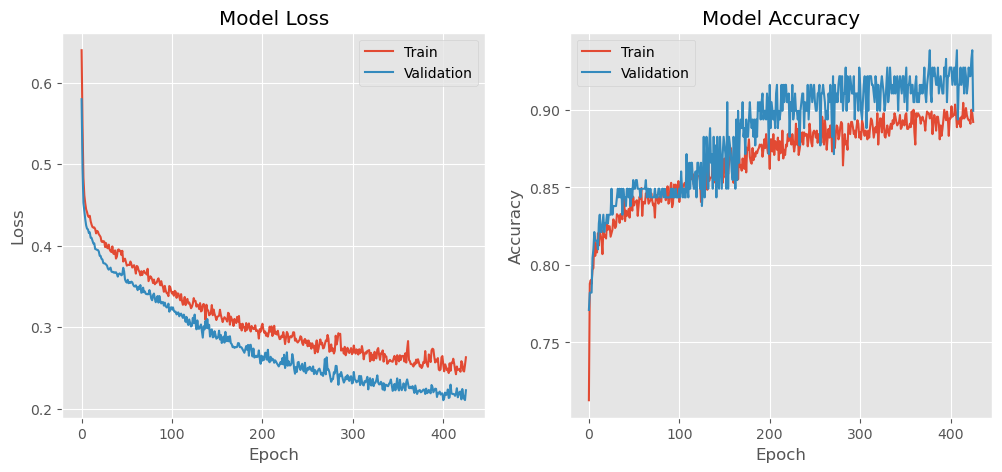

In [357]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_X.history['loss'])
plt.plot(history_X.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_X.history['accuracy'])
plt.plot(history_X.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [344]:
model_Z = tuner_11.get_best_models()[0]
model_Z

In [358]:
test_loss, test_accuracy = model_Z.evaluate(X_valid, y_valid)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8583 - loss: 0.4171  


In [348]:
best_h = tuner_11.get_best_hyperparameters()[0]
best_h.values

{'num_layers': 1,
 'units_0': 128,
 'activation': 'relu',
 'dropout': True,
 'lr': 0.0002413710835604695}

In [343]:
beast_trial_ = tuner_11.oracle.get_best_trials()[0]
beast_trial_.summary()

Trial 01 summary
Hyperparameters:
num_layers: 1
units_0: 128
activation: relu
dropout: True
lr: 0.0002413710835604695
Score: 0.8519552946090698


In [ ]:
test_predictions = model_5.predict(test)
test_predictions = (test_predictions > 0.5).astype(int).flatten()
# Prepare submission file
submission_df = pd.DataFrame({
    "PassengerId": range(892, 892 + len(test_predictions)),
    "Survived": test_predictions
})

# Save submission file
submission_df.to_csv("submission_005_drop02_epo1000.csv", index=False)